#### Applying "K-Nearest Neighbours(KNN)" Algorithm on the dataset named "Wine_Quality_Red"

Importing all the required libraries required for applying the algorithm since all the packages are pre-installed.

--> Numpy - It is a powerful numerical computing library in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. 

--> Pandas - It is a powerful and popular open-source data manipulation and analysis library for Python. It provides data structures for efficiently storing and manipulating large datasets, along with tools for reading and writing data in different file formats. 

--> Sklearn - Scikit-learn is a popular machine learning library for Python that provides simple and efficient tools for data analysis and modeling. It is built on NumPy, SciPy, and Matplotlib and provides a wide range of machine learning algorithms for tasks such as classification, regression, clustering, and dimensionality reduction. 

--> matplotlib - It is a comprehensive 2D plotting library for Python. It produces high-quality static, animated, and interactive visualizations in Python. Matplotlib is designed to work seamlessly with NumPy, providing an easy way to visualize data and results from numerical computations. 

--> seaborn - It is a comprehensive 2D plotting library for Python. It produces high-quality static, animated, and interactive visualizations in Python. Matplotlib is designed to work seamlessly with NumPy, providing an easy way to visualize data and results from numerical computations. 

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset "Wine_Quality_Red" which is saved in the same folder as the python script

wine_quality_red = pd.read_csv("Wine_Quality_Red.csv")

The dataset consists of red wine data specifically referring to the feature "quality" stating the quality of it (categorical - 0 - (at most quality red wine) and 1 - (at least quality red wine). Due o privacy and logistic issues, only physiochemical (inputs) and sensory (the output) variables are available. (e.g., there is no data about the grape types, wine brand, wine selling price etc.,)

In [4]:
#to get the dimensions of the array or DataFrame
wine_quality_red.shape

(1599, 12)

In [5]:
#to display the first few rows of the dataset
wine_quality_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
1,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
2,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
3,7.1,0.16,0.44,2.5,0.068,17.0,31.0,0.99328,3.35,0.54,12.4,1
4,6.7,0.16,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,1


In [64]:
#to display the last few rows of the dataset
wine_quality_red.tail()

,fix_acdty,vol_acdty,ctrc_acd,resi_sgr,chlrds,free_sul_dio,tot_sul_dio,dnsty,ph,slphts,alchl,qual
1594,7.4,1.185,0.00,4.25,0.097000,5.0,14.0,0.99660,3.63,0.54,10.7,0
1595,9.8,1.240,0.34,2.00,0.079000,32.0,151.0,0.99800,3.15,0.53,9.5,0
1596,8.2,1.330,0.00,1.70,0.081000,3.0,12.0,0.99640,3.53,0.49,10.9,0
1597,8.1,1.330,0.00,1.80,0.087479,3.0,12.0,0.99640,3.54,0.48,10.9,0
1598,7.6,1.580,0.00,2.10,0.137000,5.0,9.0,0.99476,3.50,0.40,10.9,0


In [6]:
#to obtain a concise summary of the DataFrame's structure, including information about the data types, non-null values, and memory usage.

wine_quality_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1598 non-null   float64
 1   volatile acidity      1595 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1594 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1597 non-null   float64
 6   total sulfur dioxide  1597 non-null   float64
 7   density               1598 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1598 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#to generate descriptive statistics of the numerical columns, we can use the below code. It provides information such as the mean, standard deviation, minimum, maximum, and various percentiles. 

wine_quality_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1598.000000,1595.000000,1596.000000,1594.000000,1596.000000,1597.000000,1597.000000,1598.000000,1597.000000,1599.000000,1598.000000,1599.000000
mean,8.317647,0.527981,0.270940,2.532215,0.087479,15.855980,46.463995,0.996746,3.311209,0.658149,10.422372,0.534709
std,1.739821,0.179010,0.194834,1.373917,0.047108,10.450051,32.913236,0.001888,0.154349,0.169507,1.065721,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997830,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.400000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [8]:
#Expression is used to check for missing values (NaN or null values) in all cells of a Pandas DataFrame

wine_quality_red.iloc[:,:].isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,True,False,False,False,False,False,False,False


In [9]:
#Expression is used to check if there are any missing values (NaN or null values) in the entire Pandas DataFrame.

wine_quality_red.iloc[:,:].isnull().values.any()

True

In [10]:
#Expression is used to get the number of missing values in each feature in the dataset

wine_quality_red.isnull().sum()

fixed acidity           1
volatile acidity        4
citric acid             3
residual sugar          5
chlorides               3
free sulfur dioxide     2
total sulfur dioxide    2
density                 1
pH                      2
sulphates               0
alcohol                 1
quality                 0
dtype: int64

--> Here, the features "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "alcohol" and "quality" contains null values, so we need to impute it so as to continue with our Classification KNN Algorithm. Hence, we need to install a package called "sklearn"

In [11]:
!pip install scikit-learn

In [12]:
from sklearn.impute import SimpleImputer

The mean strategy of the SimpleImputer is a method for imputing missing values in a dataset. The SimpleImputer class is part of the scikit-learn library and provides a convenient way to replace missing values with a specified strategy. The mean strategy involves replacing missing values with the mean of the non-missing values in the same column. Let's use the mean strategy of SimpleImputer to normalize the values.

In [13]:
imputedValue = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputedValue = imputedValue.fit(wine_quality_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'alcohol']])
wine_quality_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'alcohol']] = imputedValue.transform(wine_quality_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'alcohol']])
wine_quality_red.head() #to view the first few rows of data just to confirm the values have simpleImputed or not

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
1,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
2,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
3,7.1,0.16,0.44,2.5,0.068,17.0,31.0,0.99328,3.35,0.54,12.4,1
4,6.7,0.16,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,1


In [14]:
#Let's double confirm if there is any null values after the SimpleImputer normalization

wine_quality_red.iloc[:,:].isnull().values.any()

False

In [15]:
wine_quality_red.info() #to obtain a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Hence, we can confirm that all the null values have filled-up with the mean values as per the simpleImputer pre-rpocessing. But, we could still find the features names are too large and hence to cut-short the field names as per the field name standards, we can use the below codeline

In [18]:
#storing the new feature names needed into a new variable
feature_name_modified = {'fixed acidity': 'fix_acdty', 'volatile acidity': 'vol_acdty', 'citric acid': 'ctrc_acd', 'residual sugar':'resi_sgr','chlorides':'chlrds','free sulfur dioxide':'free_sul_dio','total sulfur dioxide':'tot_sul_dio','density':'dnsty','pH':'ph','sulphates':'slphts','alcohol':'alchl','quality':'qual'}
#change the feature name of our dataset
wine_quality_red = wine_quality_red.rename(columns=feature_name_modified)
wine_quality_red.head() #to check the difference in the feature names

,fix_acdty,vol_acdty,ctrc_acd,resi_sgr,chlrds,free_sul_dio,tot_sul_dio,dnsty,ph,slphts,alchl,qual
0,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
1,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
2,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
3,7.1,0.16,0.44,2.5,0.068,17.0,31.0,0.99328,3.35,0.54,12.4,1
4,6.7,0.16,0.64,2.1,0.059,24.0,52.0,0.99494,3.34,0.71,11.2,1


In [65]:
wine_quality_red.info() #to obtain a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fix_acdty     1599 non-null   float64
 1   vol_acdty     1599 non-null   float64
 2   ctrc_acd      1599 non-null   float64
 3   resi_sgr      1599 non-null   float64
 4   chlrds        1599 non-null   float64
 5   free_sul_dio  1599 non-null   float64
 6   tot_sul_dio   1599 non-null   float64
 7   dnsty         1599 non-null   float64
 8   ph            1599 non-null   float64
 9   slphts        1599 non-null   float64
 10  alchl         1599 non-null   float64
 11  qual          1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Hence the pre-processing steps got completed. Let's begin with the classification algorithm hereby. In the dataset, lets check on which factor the quality of the red wine depends upon, for that, plot a histogram to check the feature one after one.

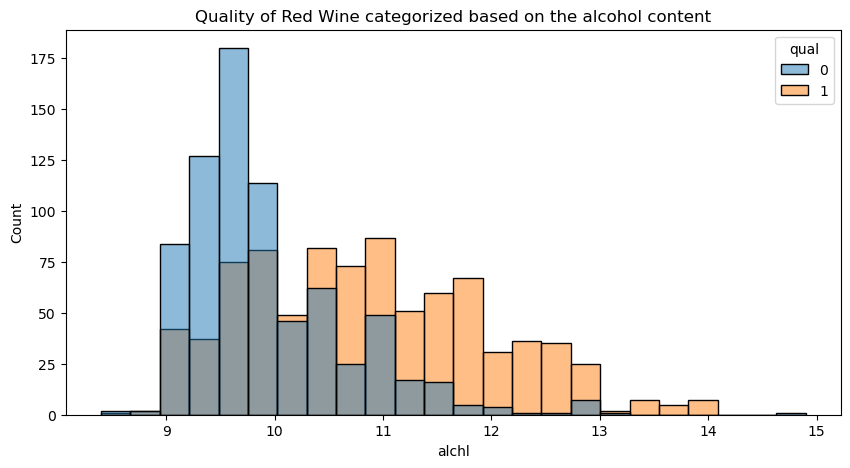

In [23]:
#Analysis of feature:1:- "alchl" - Alcohol
#Lets categorize the red wine quality according to the levels of alcohol content in it

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the alcohol content")
sns.histplot(x="alchl", hue = "qual", data= wine_quality_red)
plt.show()

#The wine quality tends to increase when alcohol content in it increases. But the count of the red-wine is high with very less quality and very less alcohol content as well.

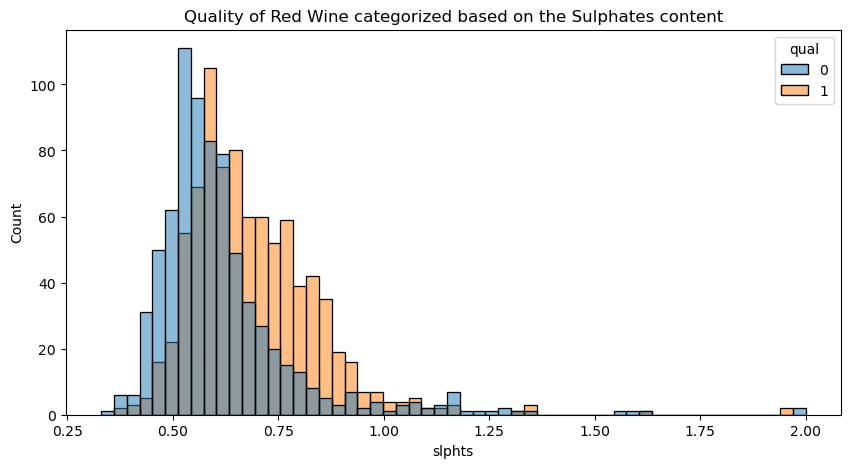

In [24]:
#Analysis of feature:2:- "slphts" - Sulphates
#Lets categorize the red wine quality according to the levels of Sulphates content in it

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the Sulphates content")
sns.histplot(x="slphts", hue = "qual", data= wine_quality_red)
plt.show()

#We can see a very high quality of red-wine contains moderate levels of Sulphates in it (~ between 0.60 to 1.00)

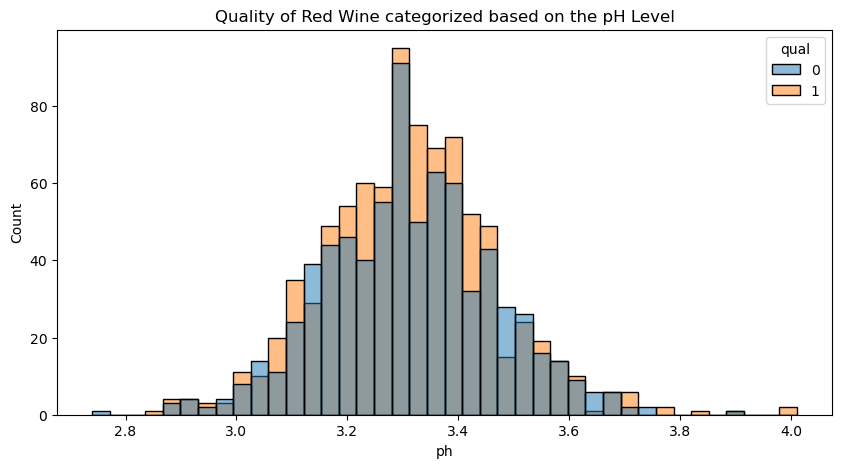

In [25]:
#Analysis of feature:3:- "ph" - pH value
#Lets categorize the red wine quality according to the pH value of it

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the pH Level")
sns.histplot(x="ph", hue = "qual", data= wine_quality_red)
plt.show()

#pH levels of red wine with high quality is almost concentrated between 3.0 to 3.5

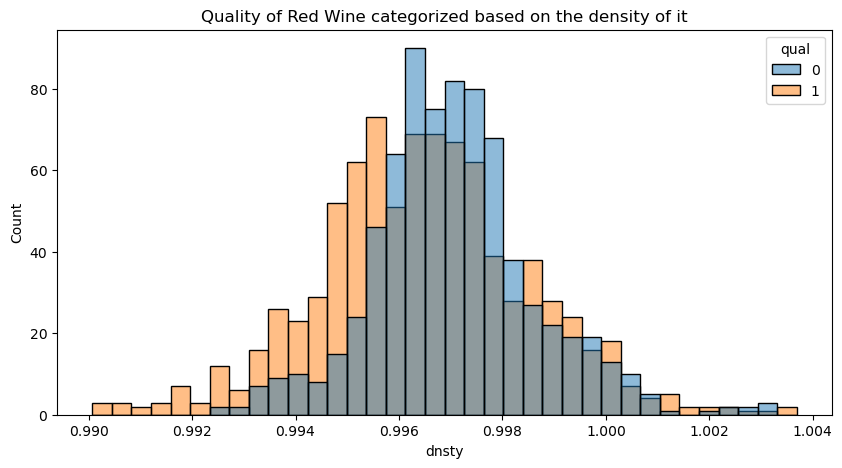

In [27]:
#Analysis of feature:1:- dnsty (density)
#Lets categorize the red wine quality according to the levels of alcohol content in it

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the density of it")
sns.histplot(x="dnsty", hue = "qual", data= wine_quality_red)
plt.show()

#The wine quality tends is highests and almost concentrated on the density between 0.990 gram/litre and 0.995 gram/litre

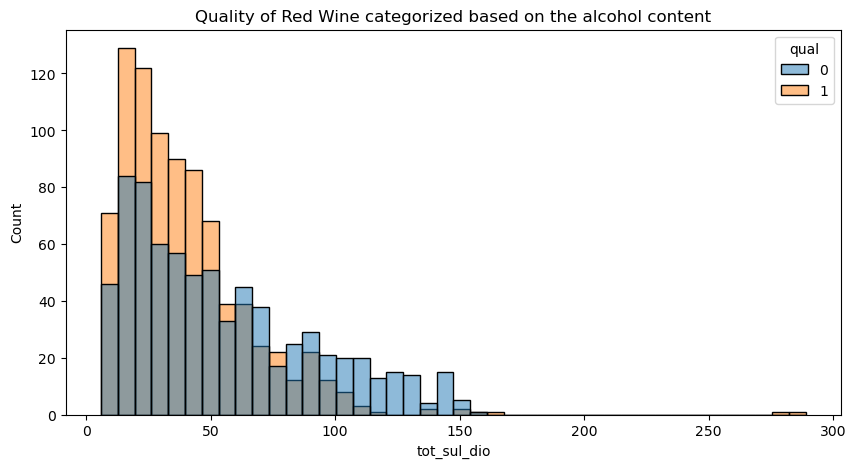

In [28]:
#Analysis of feature:1:- "tot_sul_dio" - Total Sulphur Dioxide
#Lets categorize the red wine quality according to the Total Sulphur dioxide in it

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the alcohol content")
sns.histplot(x="tot_sul_dio", hue = "qual", data= wine_quality_red)
plt.show()

#The wine quality tends to decrease when the content of Sulphur dioxode in it increase. Hence the high quality wine are concentrated with a sulphur dioxode content within 50 mg/L

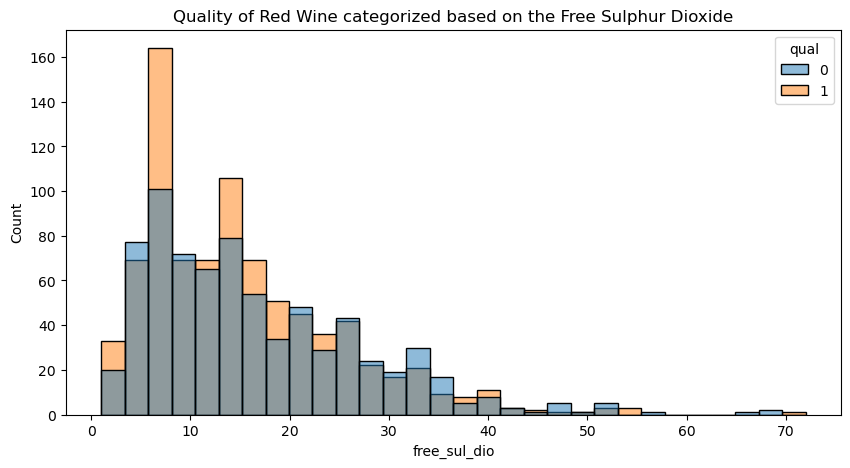

In [30]:
#Analysis of feature:1:- "free_sul_dio" - Free Sulphur Dioxide
#Lets categorize the red wine quality according to the amount of Free Sulphus dioxide in red-wine

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the Free Sulphur Dioxide")
sns.histplot(x="free_sul_dio", hue = "qual", data= wine_quality_red)
plt.show()

#The wine quality tends to decrease when Free Sulphur dioxide content in it increases.

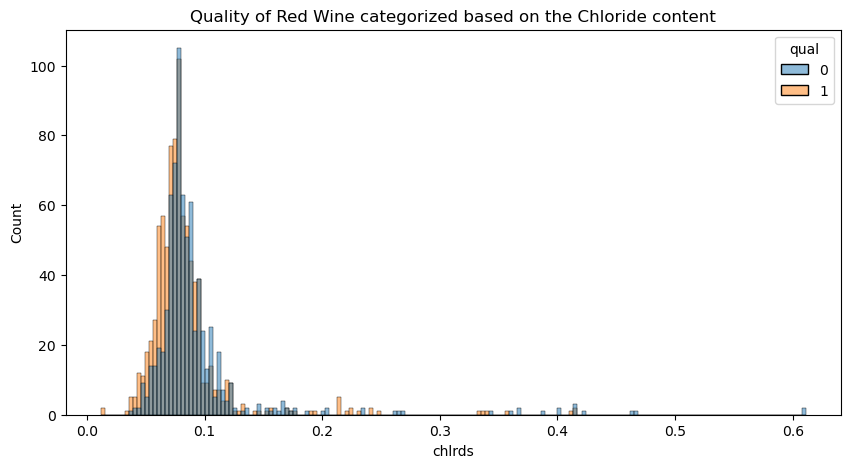

In [32]:
#Analysis of feature:1:- "chlrds" - Chlorides
#Lets categorize the red wine quality according to the levels of Chlorides in it

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the Chloride content")
sns.histplot(x="chlrds", hue = "qual", data= wine_quality_red)
plt.show()

#The high quality wine has chloride levels situated within 0.1

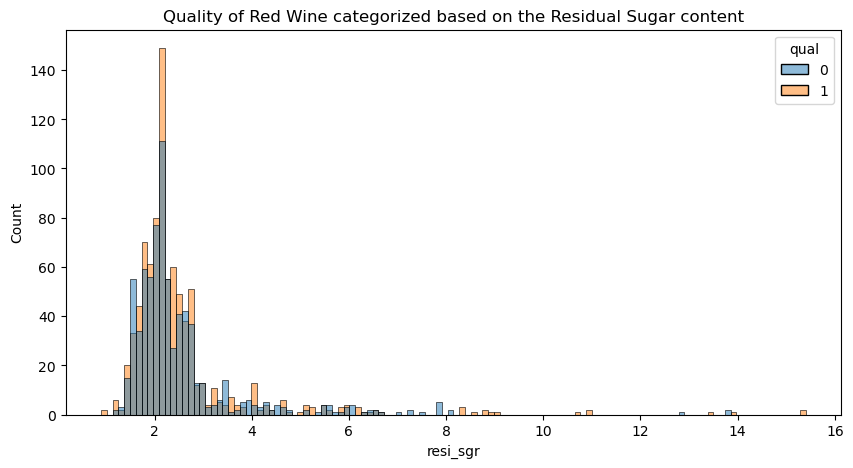

In [34]:
#Analysis of feature:1:- "resi_sgr" - Residual Sugar
#Lets categorize the red wine quality according to the levels of alcohol content in it

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the Residual Sugar content")
sns.histplot(x="resi_sgr", hue = "qual", data= wine_quality_red)
plt.show()

#The wine quality is highests in between residual sugar levels of 2 to 4

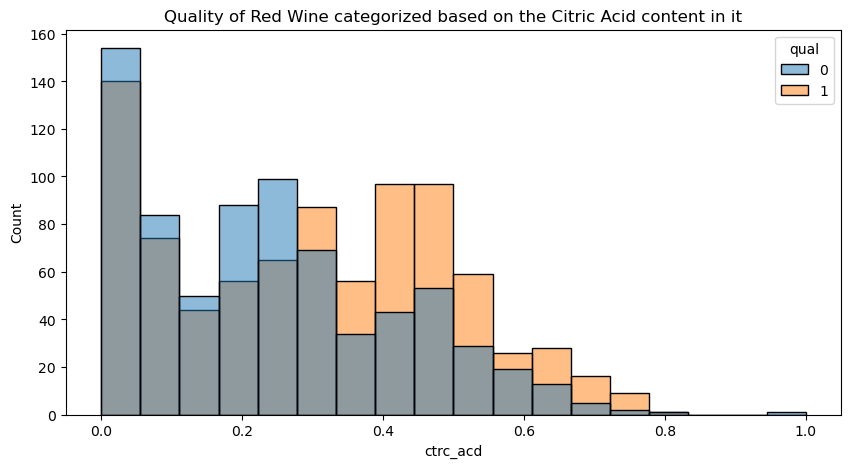

In [35]:
#Analysis of feature:1:- "ctrc_acd" - Citric Acid
#Lets categorize the red wine quality according to the levels of Citric Acid content in it

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the Citric Acid content in it")
sns.histplot(x="ctrc_acd", hue = "qual", data= wine_quality_red)
plt.show()

#The wine quality tends to increase when Citric Acid content in it increases

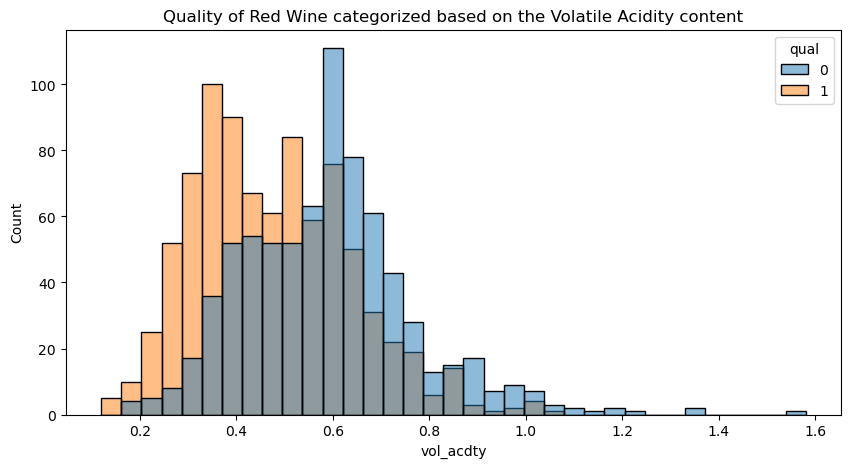

In [37]:
#Analysis of feature:1:- "vol_acdty" - Volatile Acidity
#Lets categorize the red wine quality according to the levels of alcohol content in it

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the Volatile Acidity content")
sns.histplot(x="vol_acdty", hue = "qual", data= wine_quality_red)
plt.show()

#The wine quality tends to decrease when Volatile Acidity content in it increases. The highest wine quality can be found within 0.5 g/L

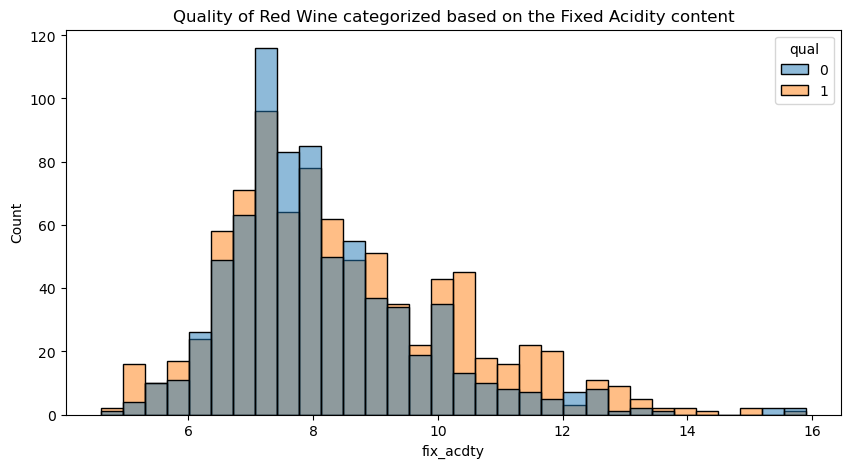

In [39]:
#Analysis of feature:1:- "fix_acdty" - Fixed Acidity
#Lets categorize the red wine quality according to the level of Fixed Acidity in it

plt.figure(figsize = (10,5))
plt.title("Quality of Red Wine categorized based on the Fixed Acidity content")
sns.histplot(x="fix_acdty", hue = "qual", data= wine_quality_red)
plt.show()

#The wine quality tends to increase when fixed acidity content in it increases

Hence completed the pre-processing steps and inital data exploration of the dataset. Now, beginning with the classification algorithm

In [40]:
#Execute the following code to determine class feature and input feature:
input_features = wine_quality_red.iloc[:,:-1].values #converts the "input_features" subset into a NumPy array.
wine_quality = wine_quality_red.iloc[:, 11].values #converts the "wine_quality" subset into a NumPy array.

In [42]:
print("The input features or values determining the overall quality output of the red wine are stored in the array given below:")
input_features

The input features or values determining the overall quality output of the red wine are stored in the array given below:


array([[ 8.9 ,  0.12,  0.45, ...,  3.41,  0.76, 11.9 ],
       [ 8.9 ,  0.12,  0.45, ...,  3.41,  0.76, 11.9 ],
       [ 8.9 ,  0.12,  0.45, ...,  3.41,  0.76, 11.9 ],
       ...,
       [ 8.2 ,  1.33,  0.  , ...,  3.53,  0.49, 10.9 ],
       [ 8.1 ,  1.33,  0.  , ...,  3.54,  0.48, 10.9 ],
       [ 7.6 ,  1.58,  0.  , ...,  3.5 ,  0.4 , 10.9 ]])

In [43]:
print("The output values showing whether the red wine quality is atmost (1) or atleast (0) are given below:")
wine_quality

The output values showing whether the red wine quality is atmost (1) or atleast (0) are given below:


array([1, 1, 1, ..., 0, 0, 0])

Now, we want to divide the complete dataset (which is already divided into two - input and output categories) into train dataset and test dataset sop as to continue with the classification and compare the analysis.

--> The test dataset size can be wither float or int, even equal to none. 

--> If it is a float, it shows the proportion of the dataset to be included in the test split and should be between 0.0 and 1.0. It will display the entire amount of test samples if it is int. The value is set to the train size's complement if it is None. The test_size will be set to 0.25 if train_size is also None.

--> The train_test_split() function's random state hyper parameter controls the shuffling process. We obtain distinct train and test sets across multiple executions when random_state = None is used. When a fixed value, such as random_state = 0, is applied to it, we obtain the same train and test sets throughout various executions.

--> Features of different sizes and scales are typically present in a dataset. The modeling of a dataset may be impacted by different scales of the data features. 

--> Numerical input variables scaled to a standard range yield better results for many machine learning algorithms, including KNN.

--> By deducting the mean and dividing by the standard deviation, standardization shifts the distribution to have a mean of zero and a standard deviation of one, scaling each input variable independently.The training data should be scaled by dividing by the standard deviation and subtracting the mean.

--> The same mean and standard deviation ought to be applied when scaling test data.The training data is subjected to the Python fit_transform() method in order to both scale the data and determine its scaling parameters (that is, the mean and variance of each feature in the training data). Scaling ought to then be implemented for the test data as well. The transform() function

In [45]:
#We should split our data to train and test dataset. You can use the following code for data splitting:

from sklearn.model_selection import train_test_split
input_features_train, input_features_test, wine_quality_train, wine_quality_test = train_test_split(input_features, wine_quality, test_size = 0.4, random_state = 0)


In [46]:
#The Following code standardizes the train and test dataset.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_features_train_set = sc.fit_transform(input_features_train)
input_features_test_set = sc.transform(input_features_test)


Training the model:

It is not necessary to implement KNN code from scratch. You can useKneighborsClassifier from scikit learn library

In [59]:
#fitting K Nearest Neighbour to the training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(input_features_train_set,wine_quality_train)

KNeighborsClassifier()

Evaluating the model Once the model is trained, we can use the ‘predict’ function on our model tomake predictions on our test data.

In [60]:
#predicting the test set results

wine_quality_predict = classifier.predict(input_features_test_set)
print(wine_quality_predict)

[1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1
 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1
 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0
 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 

Y_predict shows the predicted class (label) for test dataset. Print the real value of labels in test dataset and compare them with predicted values:

In [61]:
print(wine_quality)

[1 1 1 ... 0 0 0]


In [62]:
#To evaluate the performance of model, you can use the following code:

from sklearn import metrics
accuracy = metrics.accuracy_score(wine_quality_test, wine_quality_predict)
print("accuracy:%.2f\n\n"%(accuracy))
confusion_matrix = metrics.confusion_matrix(wine_quality_test, wine_quality_predict)
print("Confusion Matrix:")
print(confusion_matrix, '\n\n')
print("------------------------------------------------")
result = metrics.classification_report(wine_quality_test, wine_quality_predict)
print("Classification Report:")
print(result)

accuracy:0.71


Confusion Matrix:
[[178 118]
 [ 70 274]] 


------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       296
           1       0.70      0.80      0.74       344

    accuracy                           0.71       640
   macro avg       0.71      0.70      0.70       640
weighted avg       0.71      0.71      0.70       640



The confusion_matrix function generates a confusion matrix using thegenerated predictions (y_pred) and the true class labels for the test data (y_test).It shows the number of TP, FN, FP and TN.

The classification_report function shows different metrics such as precision,recall, f1-score, etc., for model evaluation

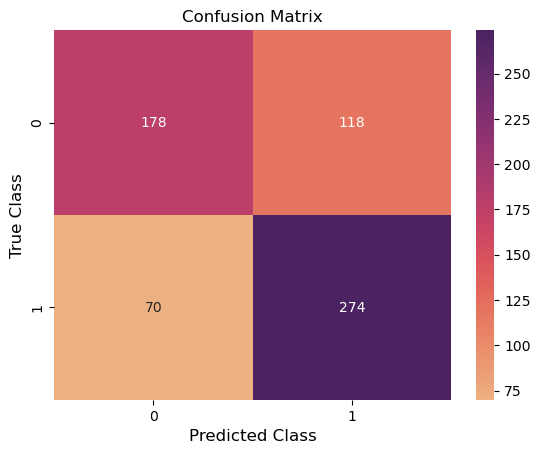

In [63]:
#using seaborn heatmap to visualise the confusion matrix.
visual_confusion_matix = sns.heatmap(confusion_matrix, cmap = 'flare', annot = True, fmt='d')
plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize = 12)
plt.show()